## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  40.484592   527.589967  0.375163  6.082670  1.217769
1  75.206546  1353.902066  0.510594  5.206921  1.503412
2  64.401150   905.434945  0.119220  4.172767  1.094246
3  72.147279  1099.950741  0.418564  9.229041  1.416501
4  49.427959  1379.996411  0.119822  4.754798  1.242578


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9256685	total: 58ms	remaining: 57.9s
1:	learn: 0.9189338	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9090765	total: 59.3ms	remaining: 19.7s
3:	learn: 0.8993360	total: 59.8ms	remaining: 14.9s
4:	learn: 0.8900696	total: 60.2ms	remaining: 12s
5:	learn: 0.8824583	total: 60.7ms	remaining: 10.1s
6:	learn: 0.8732437	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8638584	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8553411	total: 62ms	remaining: 6.83s
9:	learn: 0.8469035	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8366432	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8281981	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8211559	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8131390	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8029130	total: 64.8ms	remaining: 4.25s
15:	learn: 0.7945909	total: 65.2ms	remaining: 4.01s
16:	learn: 0.7840770	total: 65.6ms	remaining: 3.79s
17:	learn: 0.7752711	total: 66ms	remaining: 3.6s
18:	learn: 0.7683041	total: 66.4ms	remaining: 3.43s
1

104:	learn: 0.3778102	total: 107ms	remaining: 912ms
105:	learn: 0.3752533	total: 108ms	remaining: 908ms
106:	learn: 0.3728148	total: 108ms	remaining: 903ms
107:	learn: 0.3699662	total: 109ms	remaining: 896ms
108:	learn: 0.3679737	total: 109ms	remaining: 889ms
109:	learn: 0.3657134	total: 109ms	remaining: 883ms
110:	learn: 0.3628541	total: 110ms	remaining: 877ms
111:	learn: 0.3600462	total: 110ms	remaining: 872ms
112:	learn: 0.3570212	total: 110ms	remaining: 867ms
113:	learn: 0.3552267	total: 111ms	remaining: 861ms
114:	learn: 0.3525867	total: 111ms	remaining: 856ms
115:	learn: 0.3502725	total: 112ms	remaining: 852ms
116:	learn: 0.3479700	total: 112ms	remaining: 846ms
117:	learn: 0.3459791	total: 113ms	remaining: 842ms
118:	learn: 0.3439596	total: 113ms	remaining: 837ms
119:	learn: 0.3409867	total: 113ms	remaining: 832ms
120:	learn: 0.3388255	total: 114ms	remaining: 827ms
121:	learn: 0.3369038	total: 114ms	remaining: 822ms
122:	learn: 0.3350801	total: 115ms	remaining: 818ms
123:	learn: 

282:	learn: 0.1452500	total: 186ms	remaining: 471ms
283:	learn: 0.1444403	total: 187ms	remaining: 470ms
284:	learn: 0.1438313	total: 187ms	remaining: 469ms
285:	learn: 0.1432501	total: 187ms	remaining: 468ms
286:	learn: 0.1428148	total: 188ms	remaining: 466ms
287:	learn: 0.1421346	total: 188ms	remaining: 465ms
288:	learn: 0.1416990	total: 189ms	remaining: 464ms
289:	learn: 0.1408032	total: 189ms	remaining: 463ms
290:	learn: 0.1403475	total: 190ms	remaining: 462ms
291:	learn: 0.1394871	total: 190ms	remaining: 461ms
292:	learn: 0.1390472	total: 190ms	remaining: 460ms
293:	learn: 0.1386699	total: 191ms	remaining: 458ms
294:	learn: 0.1379761	total: 191ms	remaining: 457ms
295:	learn: 0.1375426	total: 192ms	remaining: 456ms
296:	learn: 0.1371063	total: 192ms	remaining: 455ms
297:	learn: 0.1367325	total: 193ms	remaining: 454ms
298:	learn: 0.1364149	total: 193ms	remaining: 453ms
299:	learn: 0.1361009	total: 194ms	remaining: 452ms
300:	learn: 0.1353699	total: 194ms	remaining: 451ms
301:	learn: 

519:	learn: 0.0665648	total: 288ms	remaining: 266ms
520:	learn: 0.0663380	total: 289ms	remaining: 265ms
521:	learn: 0.0661663	total: 289ms	remaining: 265ms
522:	learn: 0.0660352	total: 289ms	remaining: 264ms
523:	learn: 0.0657782	total: 290ms	remaining: 263ms
524:	learn: 0.0655238	total: 290ms	remaining: 263ms
525:	learn: 0.0653740	total: 291ms	remaining: 262ms
526:	learn: 0.0651263	total: 291ms	remaining: 261ms
527:	learn: 0.0649598	total: 291ms	remaining: 261ms
528:	learn: 0.0647509	total: 292ms	remaining: 260ms
529:	learn: 0.0645881	total: 292ms	remaining: 259ms
530:	learn: 0.0644289	total: 293ms	remaining: 258ms
531:	learn: 0.0642832	total: 293ms	remaining: 258ms
532:	learn: 0.0641584	total: 293ms	remaining: 257ms
533:	learn: 0.0639180	total: 294ms	remaining: 256ms
534:	learn: 0.0636795	total: 294ms	remaining: 255ms
535:	learn: 0.0635258	total: 294ms	remaining: 255ms
536:	learn: 0.0633863	total: 295ms	remaining: 254ms
537:	learn: 0.0632440	total: 295ms	remaining: 254ms
538:	learn: 

705:	learn: 0.0429420	total: 367ms	remaining: 153ms
706:	learn: 0.0428053	total: 368ms	remaining: 152ms
707:	learn: 0.0427475	total: 368ms	remaining: 152ms
708:	learn: 0.0426909	total: 369ms	remaining: 151ms
709:	learn: 0.0426174	total: 369ms	remaining: 151ms
710:	learn: 0.0425324	total: 369ms	remaining: 150ms
711:	learn: 0.0422920	total: 370ms	remaining: 150ms
712:	learn: 0.0422514	total: 370ms	remaining: 149ms
713:	learn: 0.0421682	total: 371ms	remaining: 149ms
714:	learn: 0.0420953	total: 371ms	remaining: 148ms
715:	learn: 0.0418607	total: 372ms	remaining: 147ms
716:	learn: 0.0418213	total: 372ms	remaining: 147ms
717:	learn: 0.0417407	total: 372ms	remaining: 146ms
718:	learn: 0.0415118	total: 373ms	remaining: 146ms
719:	learn: 0.0414762	total: 373ms	remaining: 145ms
720:	learn: 0.0413971	total: 374ms	remaining: 145ms
721:	learn: 0.0411737	total: 374ms	remaining: 144ms
722:	learn: 0.0411386	total: 381ms	remaining: 146ms
723:	learn: 0.0410609	total: 381ms	remaining: 145ms
724:	learn: 

930:	learn: 0.0254398	total: 471ms	remaining: 34.9ms
931:	learn: 0.0254221	total: 472ms	remaining: 34.4ms
932:	learn: 0.0254080	total: 472ms	remaining: 33.9ms
933:	learn: 0.0253068	total: 473ms	remaining: 33.4ms
934:	learn: 0.0252590	total: 473ms	remaining: 32.9ms
935:	learn: 0.0252308	total: 473ms	remaining: 32.4ms
936:	learn: 0.0251312	total: 474ms	remaining: 31.9ms
937:	learn: 0.0250844	total: 474ms	remaining: 31.4ms
938:	learn: 0.0250564	total: 475ms	remaining: 30.8ms
939:	learn: 0.0250311	total: 475ms	remaining: 30.3ms
940:	learn: 0.0250034	total: 476ms	remaining: 29.8ms
941:	learn: 0.0249574	total: 476ms	remaining: 29.3ms
942:	learn: 0.0249406	total: 477ms	remaining: 28.8ms
943:	learn: 0.0249132	total: 477ms	remaining: 28.3ms
944:	learn: 0.0247974	total: 478ms	remaining: 27.8ms
945:	learn: 0.0247041	total: 478ms	remaining: 27.3ms
946:	learn: 0.0245906	total: 478ms	remaining: 26.8ms
947:	learn: 0.0244992	total: 479ms	remaining: 26.3ms
948:	learn: 0.0244097	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

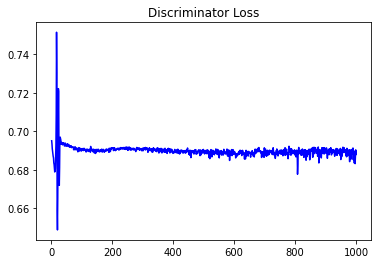

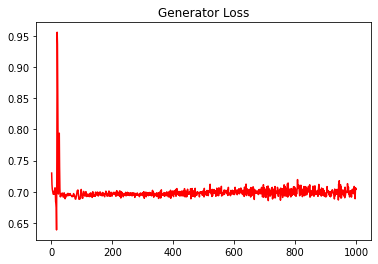

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.0181803030283034


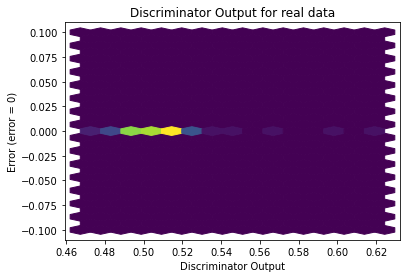

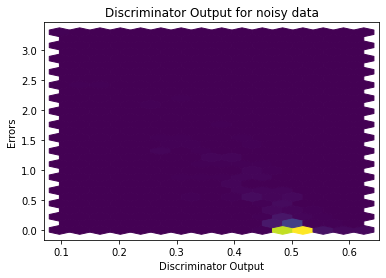

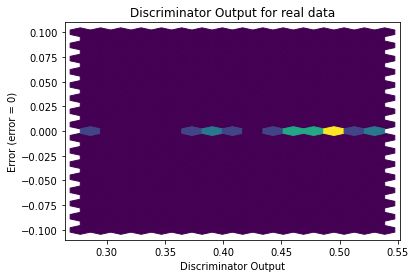

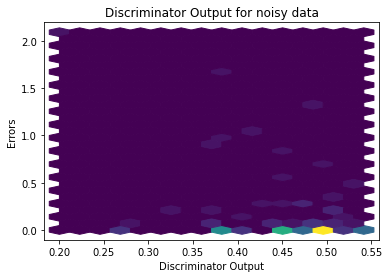

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


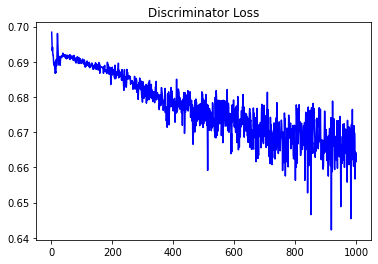

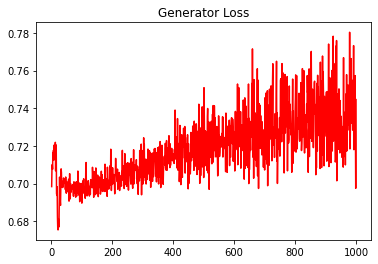

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.8517653445426518


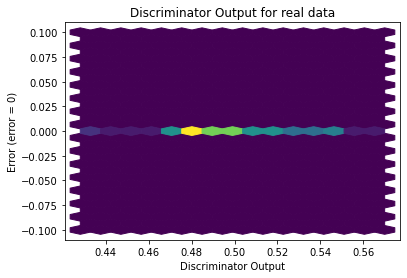

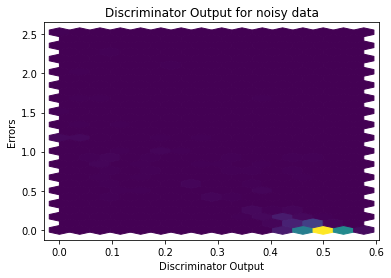

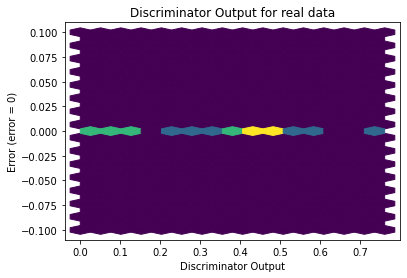

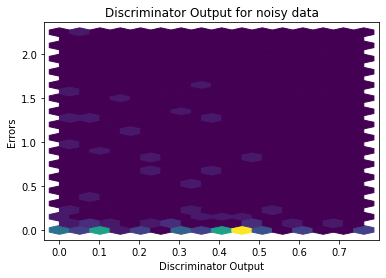

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1830]], requires_grad=True)
